In [2]:
!apt update
!apt install chromium-chromedriver
!pip install selenium

'apt' is not recognized as an internal or external command,
operable program or batch file.
'apt' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

In [6]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [8]:
browser = webdriver.Chrome(options=options)

In [10]:
browser.get('https://books.toscrape.com/')

In [12]:
print(browser.page_source)

<html lang="en-us" class="no-js"><!--<![endif]--><head>
        <title>
    All products | Books to Scrape - Sandbox
</title>

        <meta http-equiv="content-type" content="text/html; charset=UTF-8">
        <meta name="created" content="24th Jun 2016 09:29">
        <meta name="description" content="">
        <meta name="viewport" content="width=device-width">
        <meta name="robots" content="NOARCHIVE,NOCACHE">

        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
        <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->

        
            <link rel="shortcut icon" href="static/oscar/favicon.ico">
        

        
        
    
    
        <link rel="stylesheet" type="text/css" href="static/oscar/css/styles.css">
    
    <link rel="stylesheet" href="static/oscar/js/bootstrap-datetimepicker/bootstrap-datetimepicker.css">
    <link rel="stylesheet" type="text/css" href="static/oscar/css/date

In [36]:
products = browser.find_elements(By.CLASS_NAME, 'product_pod')
len(products)

20

In [165]:
name=products[0].find_element(By.CSS_SELECTOR,"article > h3 > a").get_attribute("title")
price=products[0].find_element(By.CSS_SELECTOR,".product_price p")
product_url=products[0].find_element(By.CSS_SELECTOR,".image_container a").get_attribute("href")
name,price.text,product_url

('The Nameless City (The Nameless City #1)',
 '£38.16',
 'https://books.toscrape.com/catalogue/the-nameless-city-the-nameless-city-1_940/index.html')

In [211]:
def return_product(product):
    name=product.find_element(By.CSS_SELECTOR,"article > h3 > a").get_attribute("title")
    price=product.find_element(By.CSS_SELECTOR,".product_price p").text.split("£")[1]
    product_url=product.find_element(By.CSS_SELECTOR,".image_container a").get_attribute("href")
    product_url_element = product.find_element(By.CSS_SELECTOR, ".image_container a")
    
    product_url_element.click()
    in_stock=int(browser.find_element(By.CSS_SELECTOR, ".instock.availability").text.split("(")[1].split(" ")[0].strip())
    
    browser.back()
    product_dict={
        "Name":name,
        "Price":price,
        "ProductUrl":product_url,
        "In stock":in_stock
    }
    return product_dict

In [215]:
base_url="https://books.toscrape.com/catalogue/page-"
products_on_all_pages=[]
quantities=[]
for i in range(1,5):
    url=base_url+str(i)+".html"
    browser = webdriver.Chrome(options=options)
    browser.get(url)
    products = browser.find_elements(By.CLASS_NAME, 'product_pod')
    for product in products:
        result=return_product(product)
        products_on_all_pages.append(result)
        quantities.append(result["In stock"])
products_on_all_pages

[{'Name': 'A Light in the Attic',
  'Price': '51.77',
  'ProductUrl': 'https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
  'In stock': 22},
 {'Name': 'Tipping the Velvet',
  'Price': '53.74',
  'ProductUrl': 'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
  'In stock': 20},
 {'Name': 'Soumission',
  'Price': '50.10',
  'ProductUrl': 'https://books.toscrape.com/catalogue/soumission_998/index.html',
  'In stock': 20},
 {'Name': 'Sharp Objects',
  'Price': '47.82',
  'ProductUrl': 'https://books.toscrape.com/catalogue/sharp-objects_997/index.html',
  'In stock': 20},
 {'Name': 'Sapiens: A Brief History of Humankind',
  'Price': '54.23',
  'ProductUrl': 'https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html',
  'In stock': 20},
 {'Name': 'The Requiem Red',
  'Price': '22.65',
  'ProductUrl': 'https://books.toscrape.com/catalogue/the-requiem-red_995/index.html',
  'In stock': 19},
 {'Name': 'The Dirty Lit

In [82]:
import pandas as pd

In [217]:
df=pd.DataFrame(products_on_all_pages)
df

,Name,Price,ProductUrl,In stock
0,A Light in the Attic,51.77,https://books.toscrape.com/catalogue/a-light-i...,22
1,Tipping the Velvet,53.74,https://books.toscrape.com/catalogue/tipping-t...,20
2,Soumission,50.10,https://books.toscrape.com/catalogue/soumissio...,20
3,Sharp Objects,47.82,https://books.toscrape.com/catalogue/sharp-obj...,20
4,Sapiens: A Brief History of Humankind,54.23,https://books.toscrape.com/catalogue/sapiens-a...,20
...,...,...,...,...
75,Security,39.25,https://books.toscrape.com/catalogue/security_...,16
76,"Saga, Volume 6 (Saga (Collected Editions) #6)",25.02,https://books.toscrape.com/catalogue/saga-volu...,16
77,"Saga, Volume 5 (Saga (Collected Editions) #5)",51.04,https://books.toscrape.com/catalogue/saga-volu...,16
78,Reskilling America: Learning to Labor in the T...,19.83,https://books.toscrape.com/catalogue/reskillin...,16


In [90]:
import matplotlib.pyplot as plt

In [201]:
df["Price"]=pd.to_numeric(df["Price"],errors="coerce")

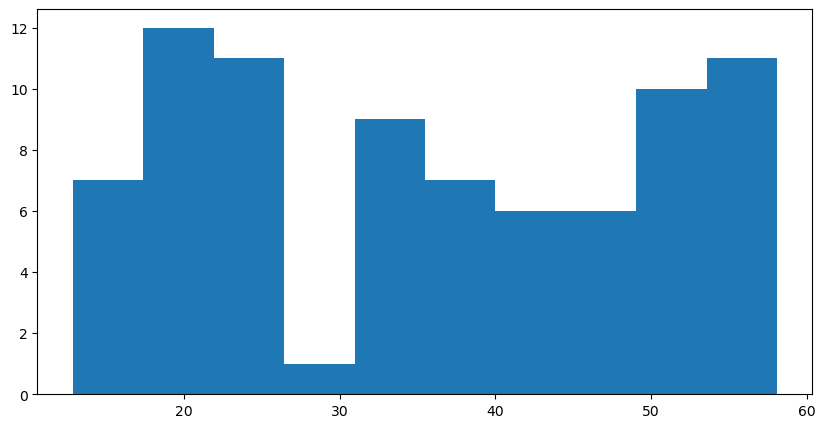

In [203]:
plt.figure(figsize=(10, 5))
plt.hist(df['Price'],bins=10)
plt.show()

In [223]:
mean_quantity = np.mean(quantities)
std_dev_quantity = np.std(quantities)
print("Mean quantity available:", mean_quantity)
print("Standard deviation of quantity available:", std_dev_quantity)

Mean quantity available: 17.475
Standard deviation of quantity available: 1.5081031131855673
